In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parents[1]))
from model import left_right_task as lrt, network_model, util, plot_style

In [2]:
import os

print(os.getcwd())

c:\Users\caele\Documents\miller-lab-final\figures\figure7


In [7]:
# task parameters
numPairs = 5
dt = 1e-5
seq_len = 6
sequences = lrt.make_all_sequences(seq_len, ['L', 'R'])
equil_duration = 2

In [ ]:
# load reliabilities
reliabilities = np.load('data_1/reliabilities.npy', allow_pickle=True)
print(reliabilities.shape)

(1000,)


### Psychometric curves

In [12]:
import scipy

In [5]:
# load p_curves
data = np.load('data_1/p_curves.npy', allow_pickle=True)
data.shape

(1000, 7)

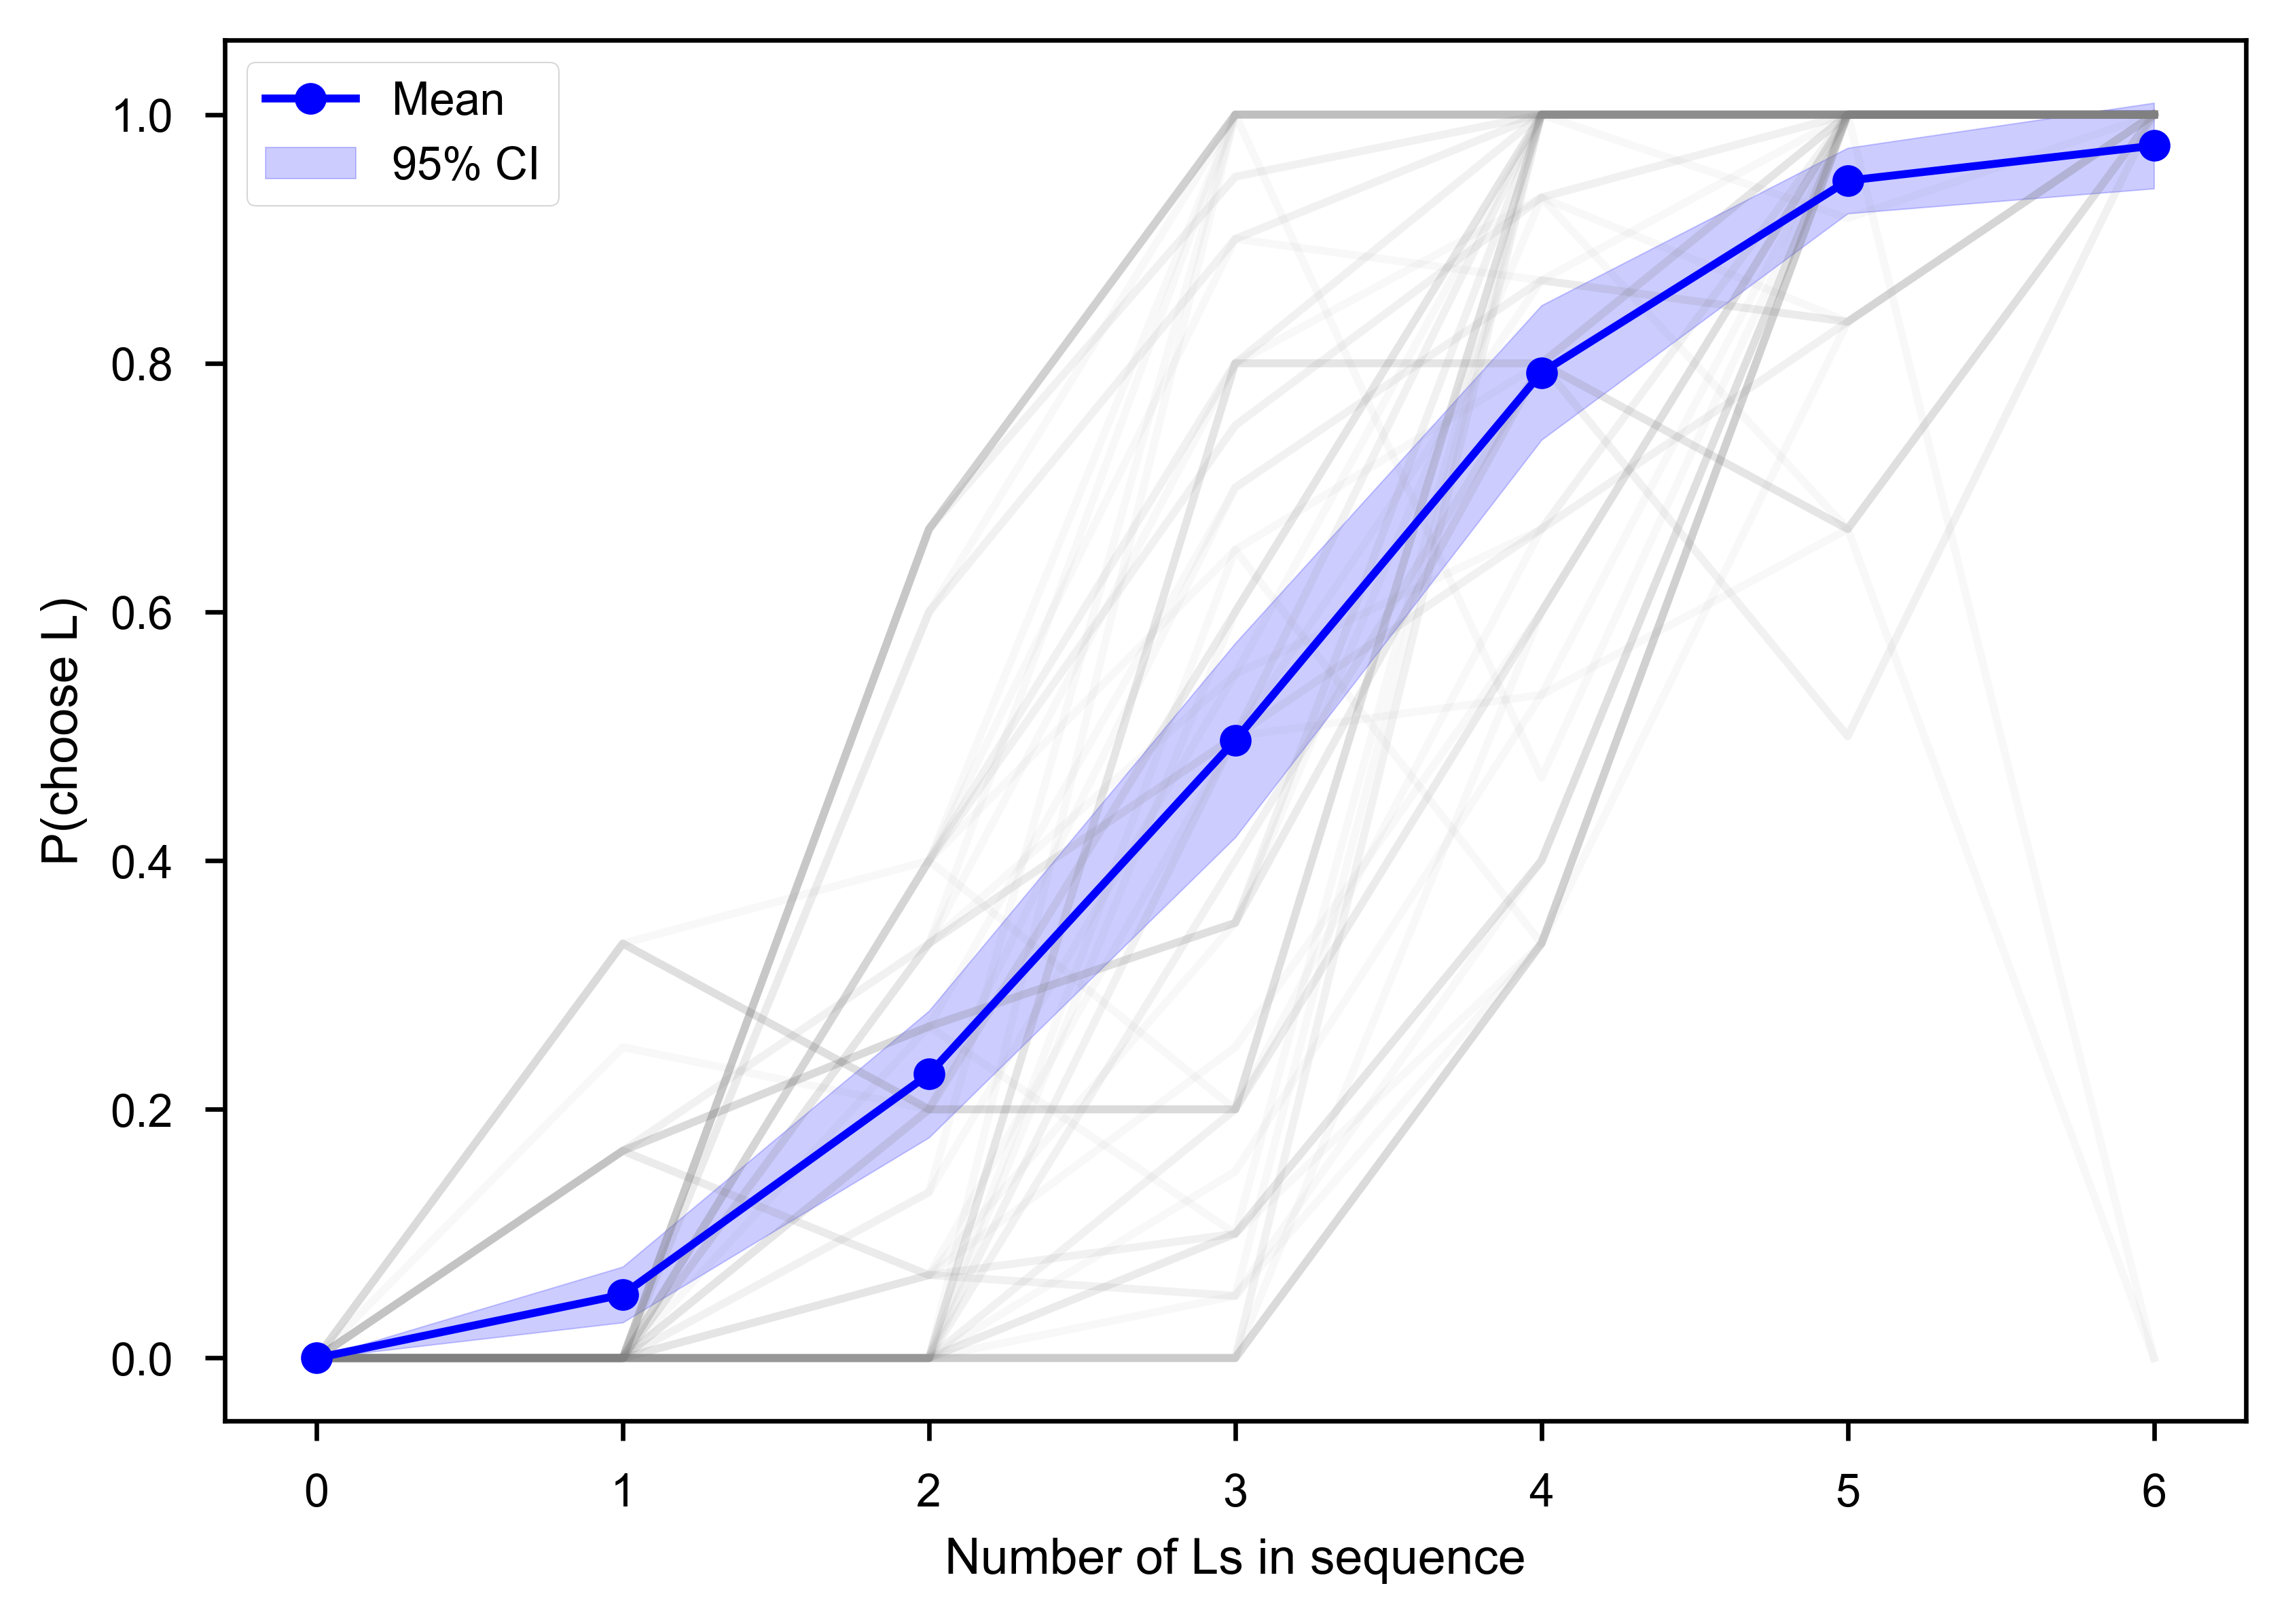

In [19]:
good_p_curves = data[reliabilities > 0.73]
plt.plot(np.arange(seq_len + 1), good_p_curves.T, color='gray', alpha=0.05)
mean_p = np.mean(good_p_curves, axis=0)
sem_p = scipy.stats.sem(good_p_curves, axis=0)
plt.plot(np.arange(seq_len + 1), mean_p, '-o', color='blue', label='Mean')
plt.fill_between(np.arange(seq_len + 1), mean_p - 1.96 * sem_p, mean_p + 1.96 * sem_p, color='blue', alpha=0.2, label='95% CI')
plt.legend()
plt.xlabel('Number of Ls in sequence')
plt.ylabel('P(choose L)')
plt.show()

### Recency + primacy

In [3]:
# load data from csv to df
df_decisions = pd.read_csv('data_1/decision_dict.csv', index_col=0)
df_decisions.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
LLLRRR,R,Tie,R,Tie,R,Tie,Tie,L,R,R,...,R,L,Tie,Tie,R,Tie,R,R,R,R
LLRRRR,R,Tie,R,Tie,R,Tie,Tie,R,R,R,...,R,L,Tie,Tie,L,Tie,R,R,R,R
LRLRRR,R,Tie,R,Tie,R,Tie,Tie,L,R,R,...,R,L,Tie,Tie,R,Tie,R,R,R,R
LRRLRR,R,Tie,R,Tie,R,Tie,Tie,L,R,R,...,R,L,Tie,Tie,L,Tie,R,R,R,R
LRRRLR,R,Tie,R,Tie,R,Tie,Tie,L,R,R,...,R,L,Tie,Tie,R,Tie,R,R,R,R


In [26]:
correlations = np.zeros((seq_len, len(df_decisions.columns))) # rows: position in sequence, cols: different networks
for i in range(seq_len):
    cue = [s[i] for s in df_decisions.index]
    num_cue = [1 if c == 'L' else -1 for c in cue]
    for j, col in enumerate(df_decisions.columns):
        decision = [1 if d == 'L' else (-1 if d == 'R' else 0) for d in df_decisions[col].values]
        correlations[i, j] = np.corrcoef(num_cue, decision)[0, 1]
correlations.shape

c:\Users\caele\miniconda3\envs\millerlab\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\caele\miniconda3\envs\millerlab\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(6, 1000)

In [ ]:
# recover kernels
r_kernels = np.zeros((numPairs))

In [32]:
# remove all rows with NaNs
correlations = correlations[:,~np.isnan(correlations).any(axis=0)]
print(np.isnan(correlations).sum())
correlations.shape

0


(6, 968)

In [33]:
# sort correlations array by the kernel mean
mean_kernel = np.mean(kernels.reshape(-1, 2*numPairs), axis=1)
mean_kernel = mean_kernel[reliabilities > 0.73]
sort_idx = np.argsort(mean_kernel)
correlations_sorted = correlations[:, sort_idx]
# figure showing each correlation sequence as a row in pcolormesh
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [1, 0.25]}, layout='constrained')

c = ax1.pcolormesh(correlations_sorted, cmap='coolwarm')
# center y ticks
ax1.set_yticks(np.arange(seq_len) + 0.5, np.arange(seq_len) + 1)
ax1.set_ylabel('Cue number')
# add colorbar
fig.colorbar(c, ax=ax1)

# plot the mean kernel
ax2.plot(mean_kernel[sort_idx], color='black', label='$mean(kernel)$')
ax2.set_ylabel('$mean(kernel)$')
ax2.set_xlabel('Trial #')
ax3 = ax2.twinx()
ax3.plot(reliabilities[reliabilities > 0.73][sort_idx], color='red', label='Reliability')
ax3.set_ylabel('Reliability')
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')

plt.show()

NameError: name 'kernels' is not defined